<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("application_train.csv")

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\n")

display(df.head())

df.info()

display(df.describe())

# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent (%)': missing_percent})
display(missing_df.head(10))

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(" numeric columns:", len(numeric_cols))
print("\n")

# Numeric columns with missing values
missing_numeric = [col for col in numeric_cols if df[col].isnull().sum() > 0]
print("🔹 Numeric columns with missing values:")
print(missing_numeric)
print("\nTotal:", len(missing_numeric))
print("\n")

# Fill missing numeric values with median
for col in missing_numeric:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Verify that all numeric missing values are filled
remaining_missing_numeric = df[missing_numeric].isnull().sum().sum()

if remaining_missing_numeric == 0:
    print("All numeric missing values have been filled.")
else:
    print("Some numeric values are still missing:", remaining_missing_numeric)

df.isnull().sum().sum()

Number of rows: 307511
Number of columns: 122




,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


,Missing Values,Percent (%)
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


 numeric columns: 106


🔹 Numeric columns with missing values:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'N

np.int64(764371)

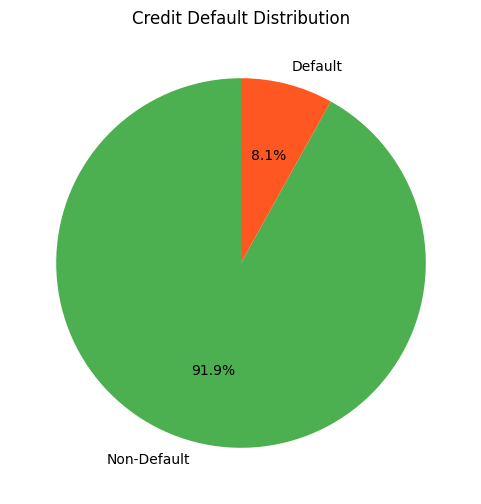

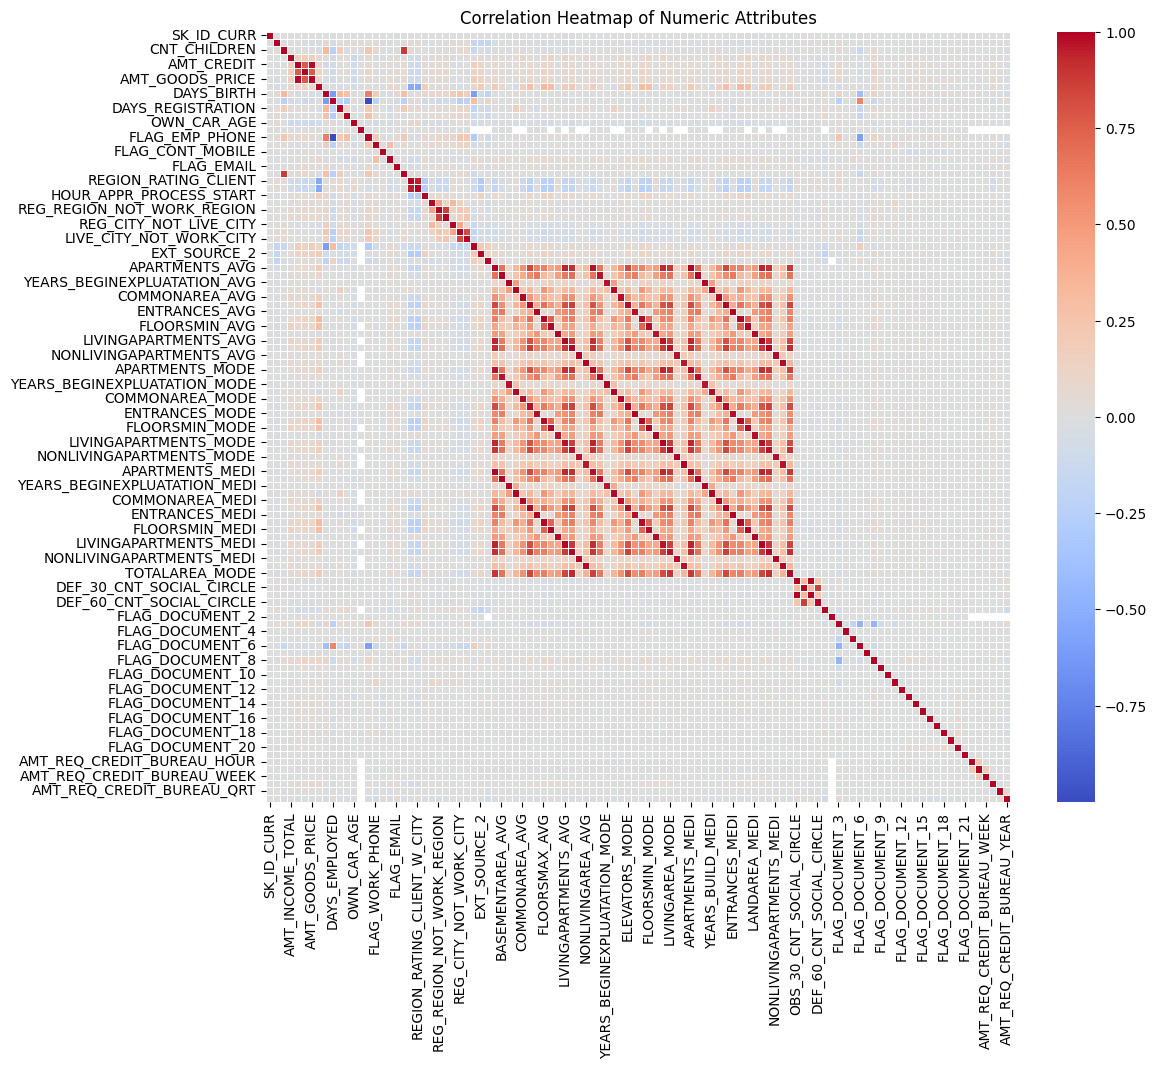

Top correlations with TARGET:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

Lowest correlations with TARGET:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


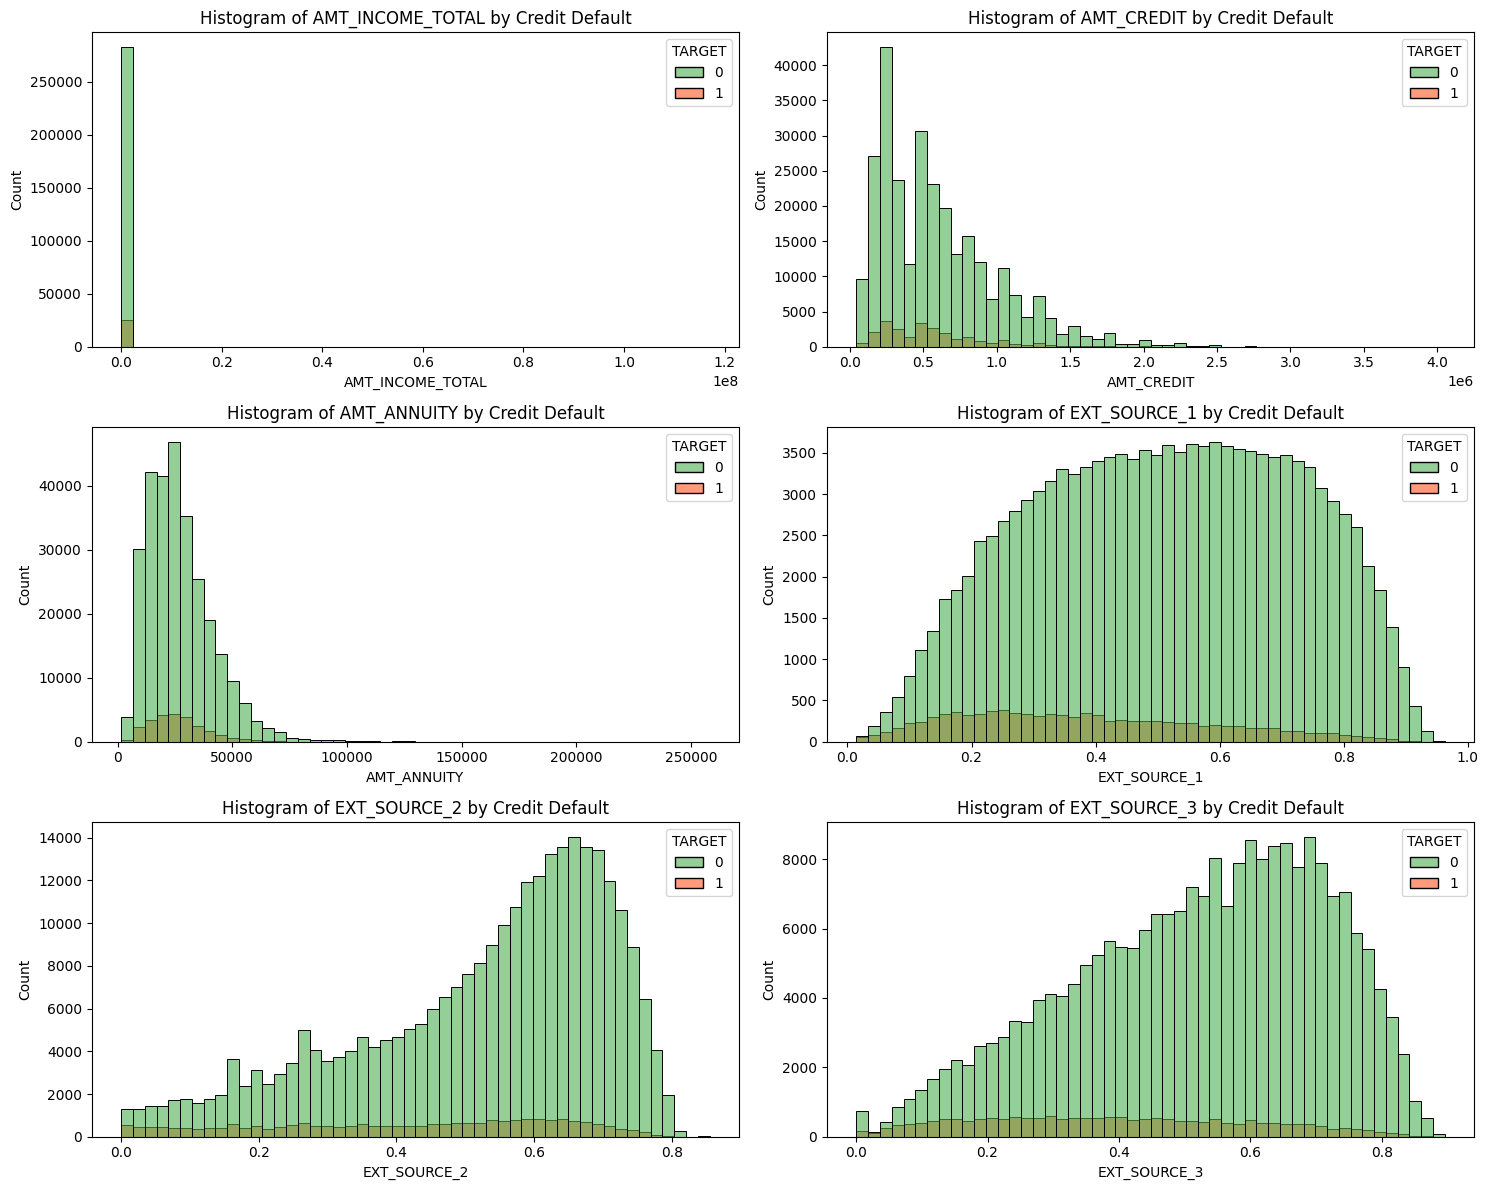

In [2]:
# 1: How do certain attributes affect credit decisions?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("application_train.csv")

# Pie chart
target_counts = df['TARGET'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['Non-Default','Default'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FF5722'])
plt.title("Credit Default Distribution")
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Attributes")
plt.show()

target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
print("Top correlations with TARGET:\n", target_corr.head(10))
print("\nLowest correlations with TARGET:\n", target_corr.tail(10))

# Histograms
key_attributes = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

plt.figure(figsize=(15,12))
for i, col in enumerate(key_attributes):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue='TARGET', bins=50, kde=False, palette={0:'#4CAF50', 1:'#FF5722'}, alpha=0.6)
    plt.title(f"Histogram of {col} by Credit Default")
plt.tight_layout()
plt.show()


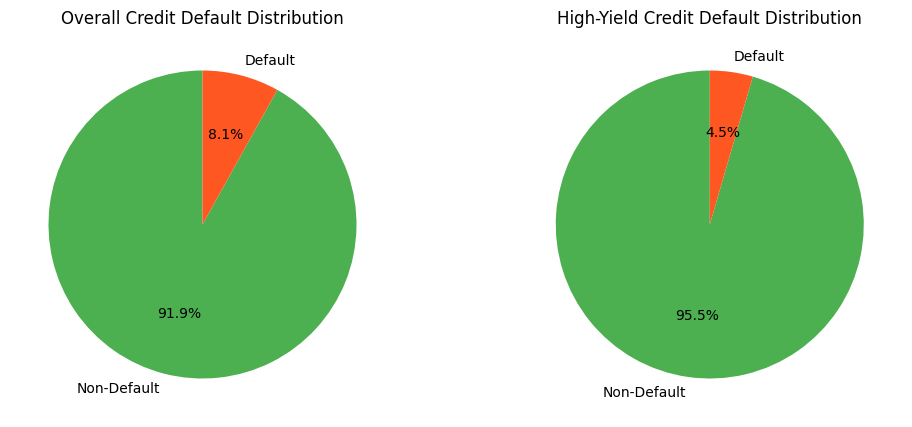

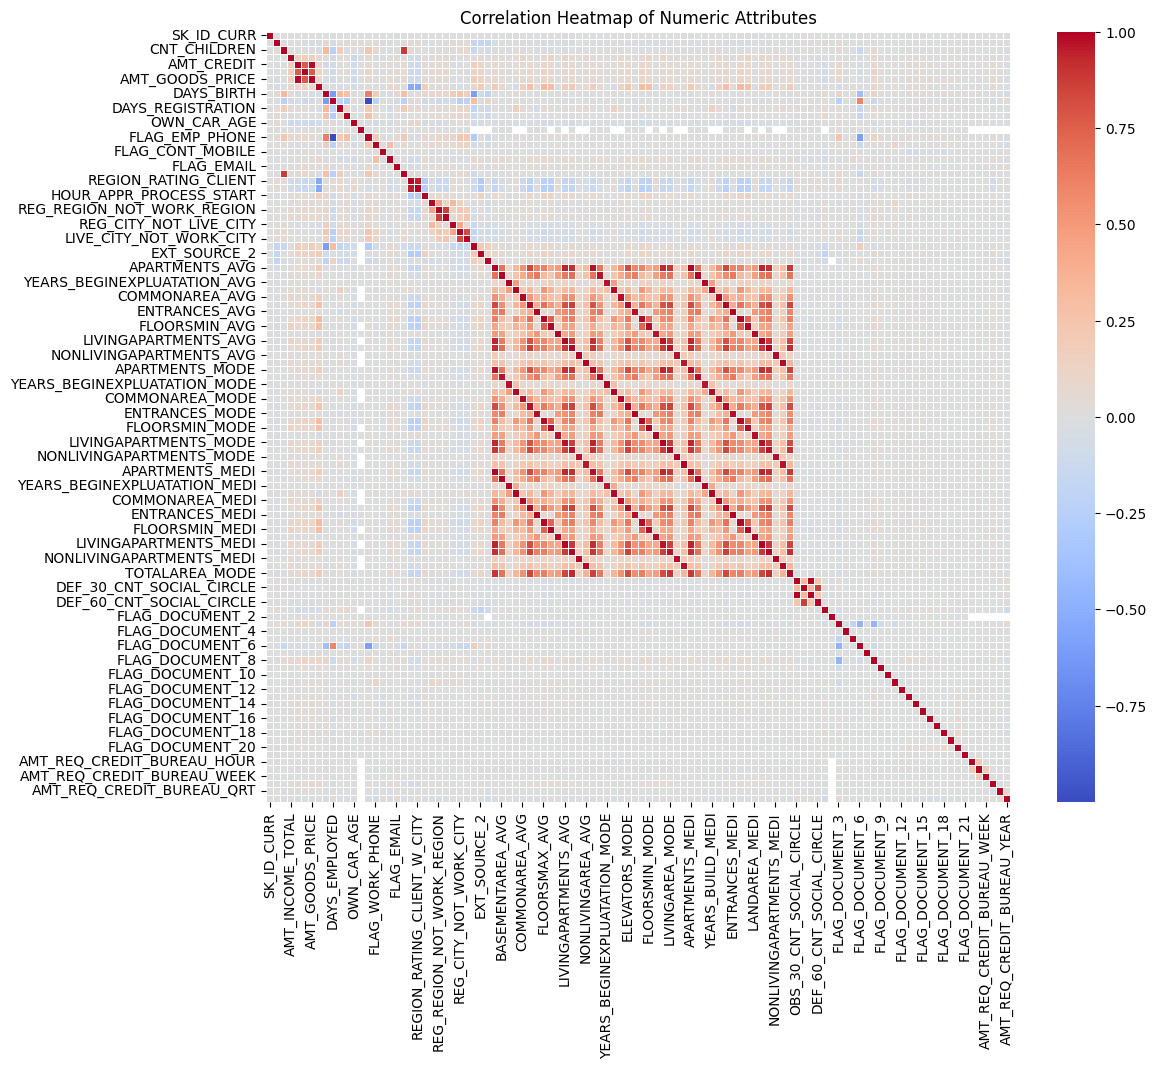

Top correlations with TARGET:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

Lowest correlations with TARGET:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


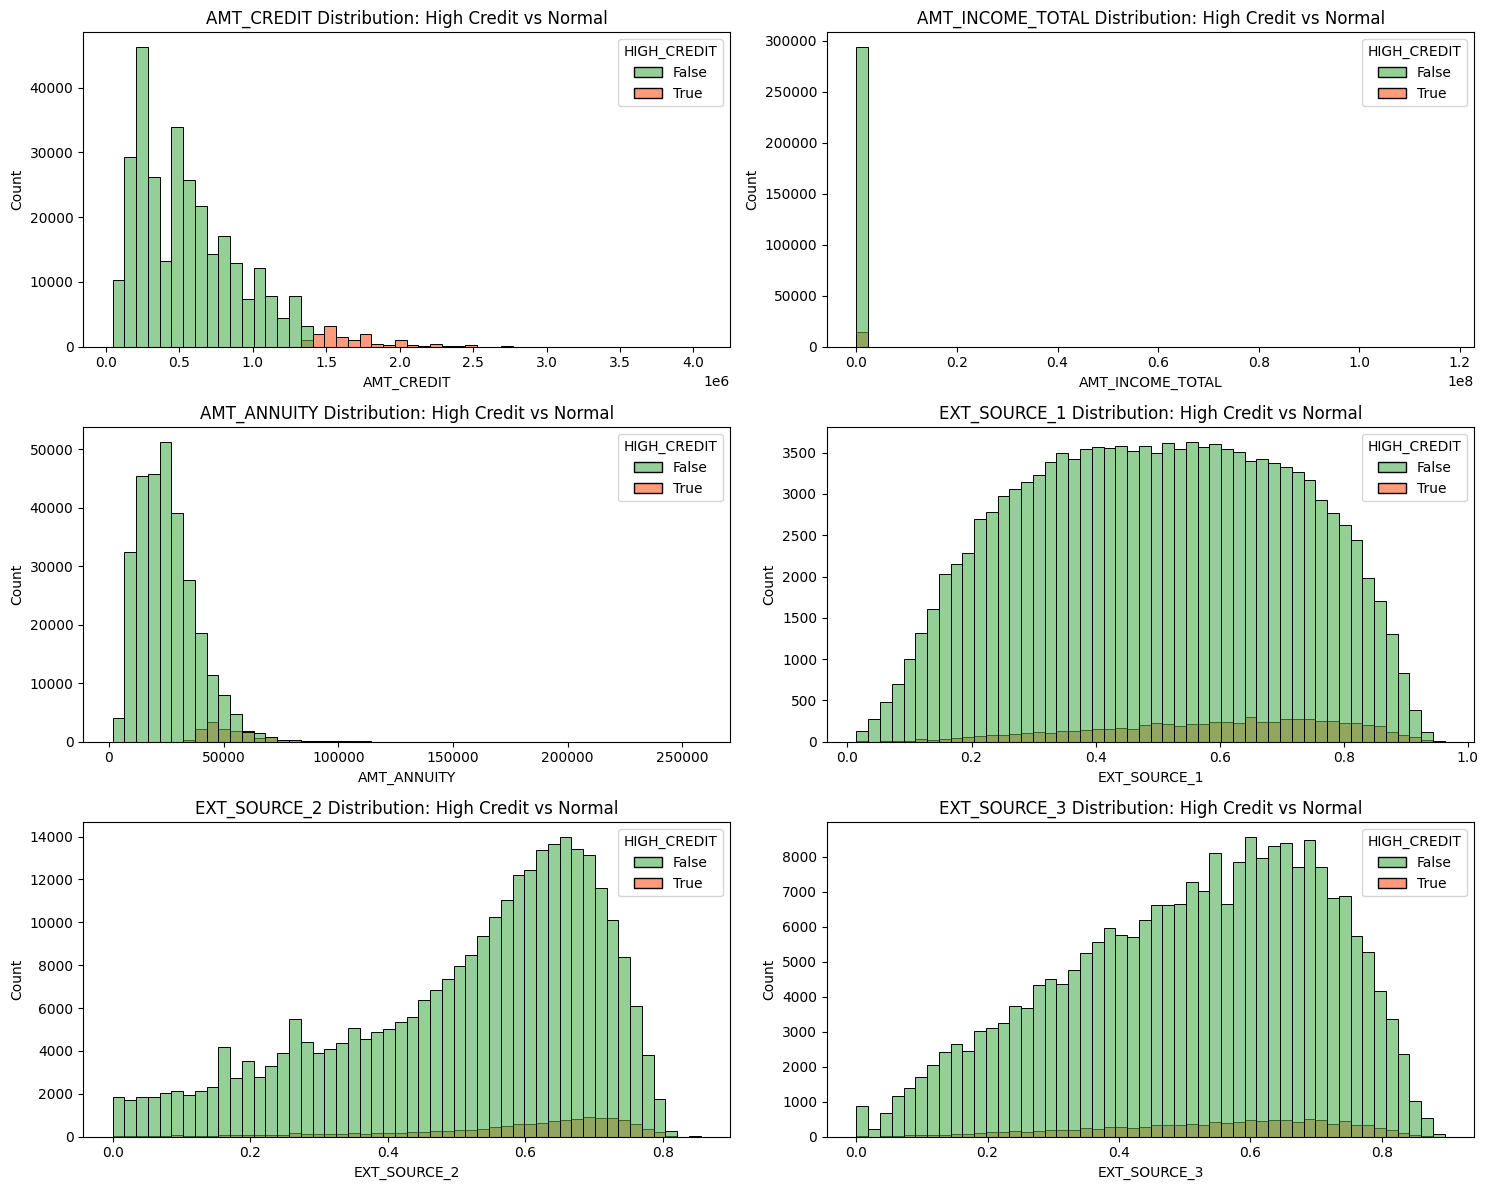

In [3]:
# 2: What is the risk impact of high-yield credit?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("application_train.csv")

high_credit_threshold = df['AMT_CREDIT'].quantile(0.95)
df['HIGH_CREDIT'] = df['AMT_CREDIT'] > high_credit_threshold

# Pie chart
plt.figure(figsize=(12,5))

# Overall target distribution
plt.subplot(1,2,1)
target_counts = df['TARGET'].value_counts()
plt.pie(target_counts, labels=['Non-Default','Default'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FF5722'])
plt.title("Overall Credit Default Distribution")

# High-yield applicants target distribution
plt.subplot(1,2,2)
high_target_counts = df[df['HIGH_CREDIT']]['TARGET'].value_counts()
plt.pie(high_target_counts, labels=['Non-Default','Default'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FF5722'])
plt.title("High-Yield Credit Default Distribution")
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Attributes")
plt.show()

target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
print("Top correlations with TARGET:\n", target_corr.head(10))
print("\nLowest correlations with TARGET:\n", target_corr.tail(10))

# Histograms
key_attributes = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

plt.figure(figsize=(15,12))
for i, col in enumerate(key_attributes):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=col, hue='HIGH_CREDIT', bins=50, kde=False, palette={False:'#4CAF50', True:'#FF5722'}, alpha=0.6)
    plt.title(f"{col} Distribution: High Credit vs Normal")
plt.tight_layout()
plt.show()


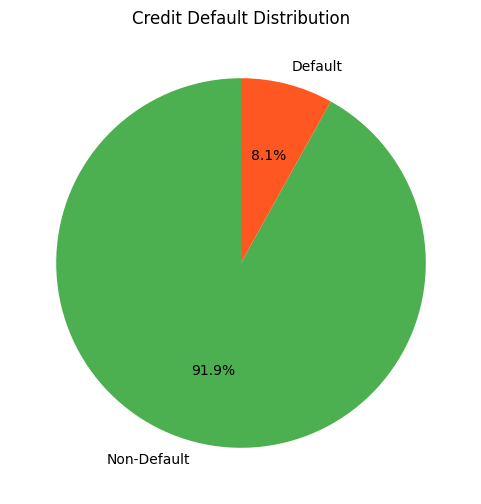

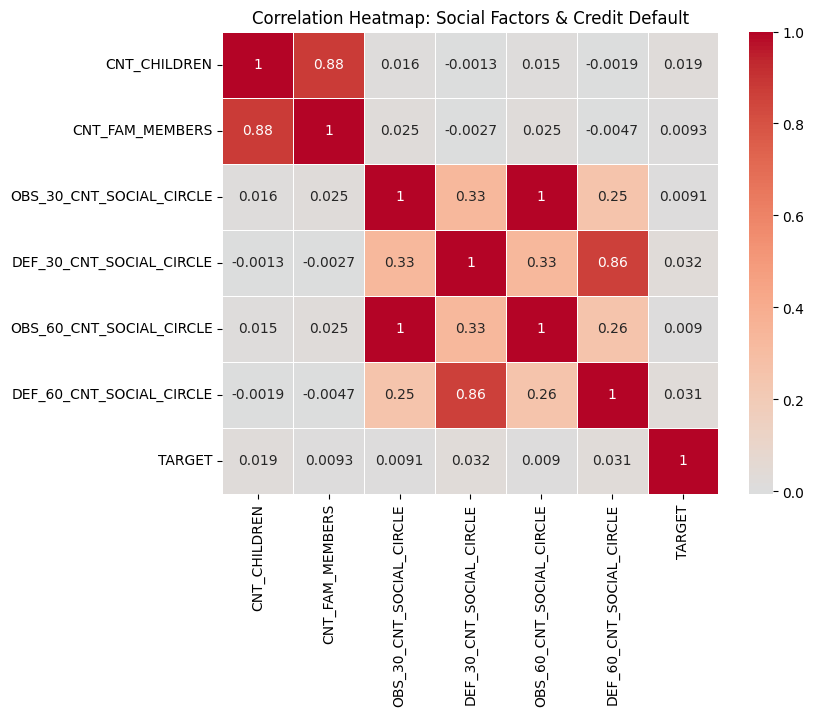

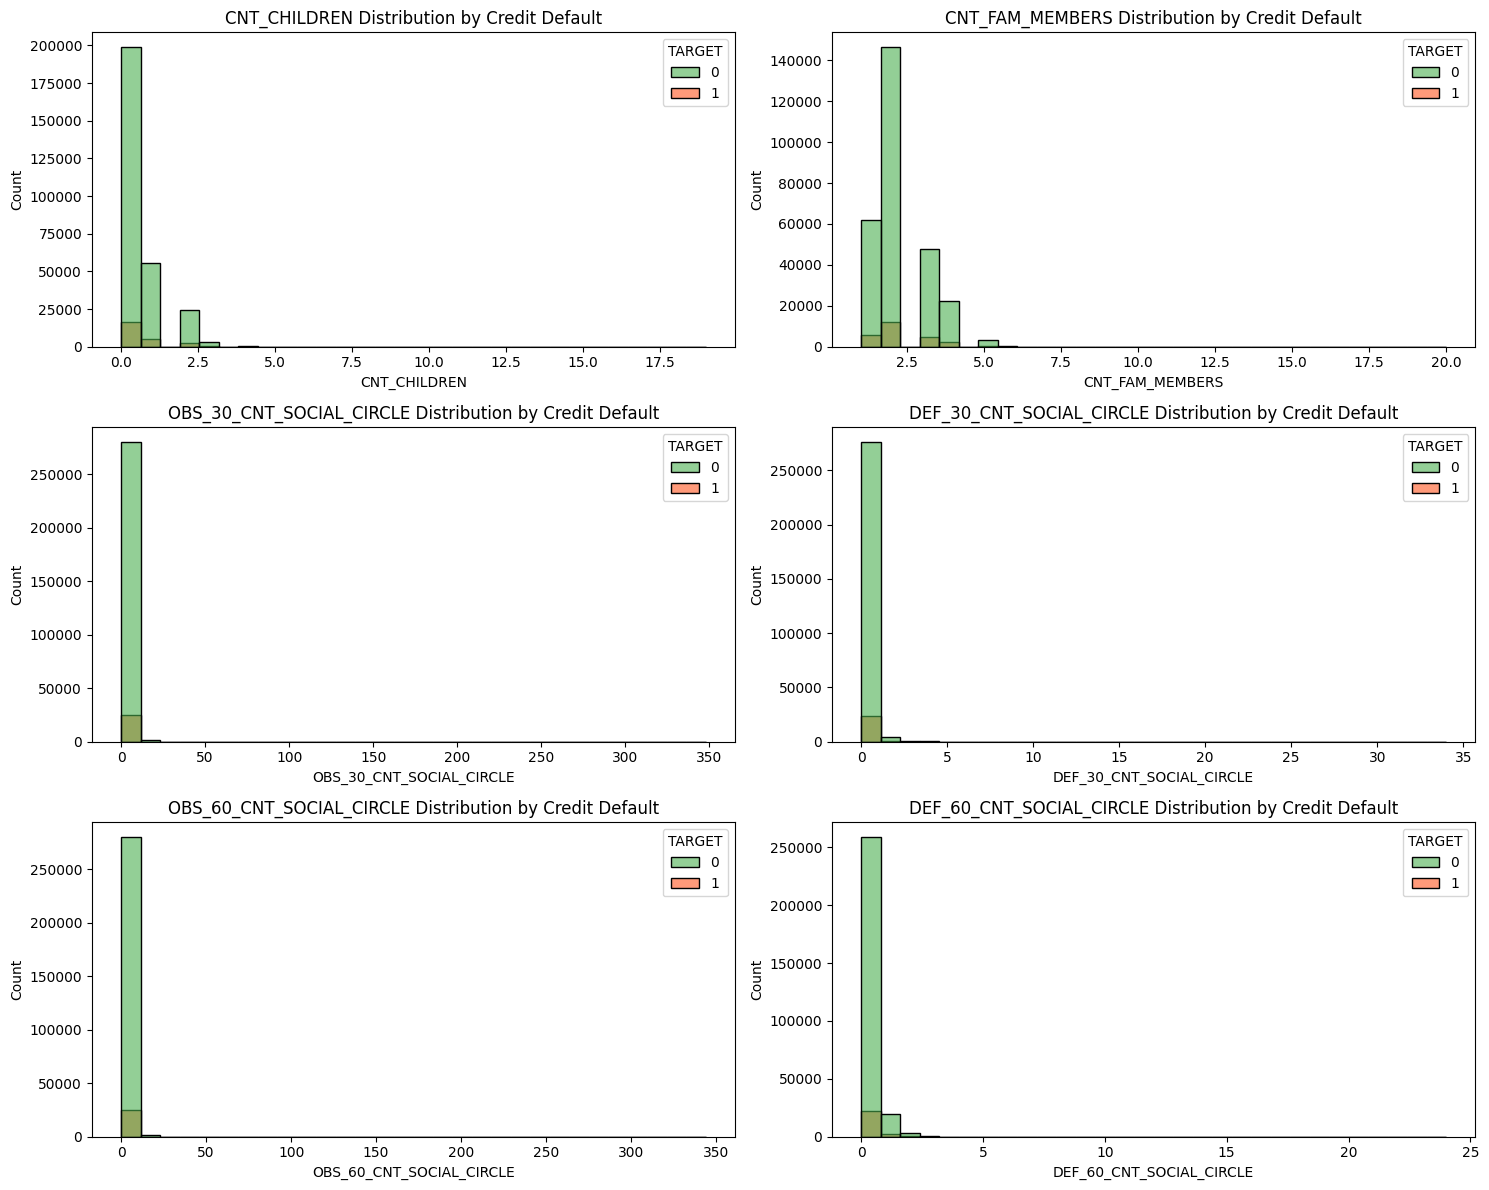

In [4]:
# 3: Are social factors relevant to credit risk?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("application_train.csv")

# Pie chart
plt.figure(figsize=(6,6))
target_counts = df['TARGET'].value_counts()
plt.pie(target_counts, labels=['Non-Default','Default'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FF5722'])
plt.title("Credit Default Distribution")
plt.show()

# Correlation heatmap
social_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS',
               'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
               'TARGET']

social_corr = df[social_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(social_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Social Factors & Credit Default")
plt.show()

# Histograms
plt.figure(figsize=(15,12))
for i, col in enumerate(social_cols[:-1]):  # exclude TARGET itself
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=col, hue='TARGET', bins=30, kde=False, palette={0:'#4CAF50', 1:'#FF5722'}, alpha=0.6)
    plt.title(f"{col} Distribution by Credit Default")
plt.tight_layout()
plt.show()


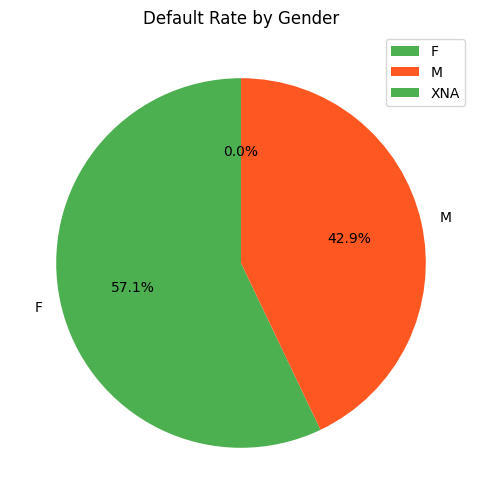

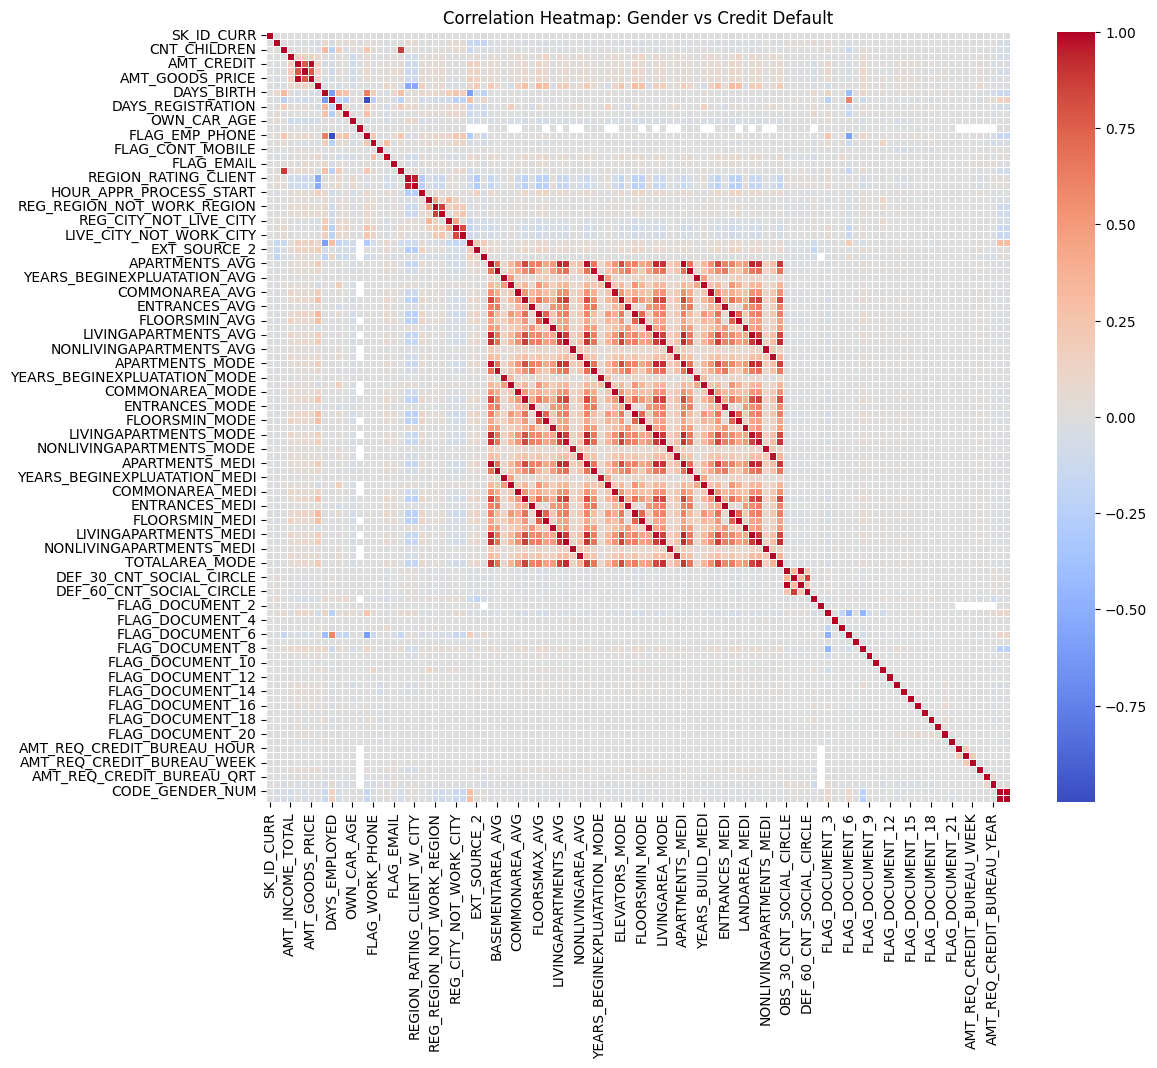

Top correlations with TARGET:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


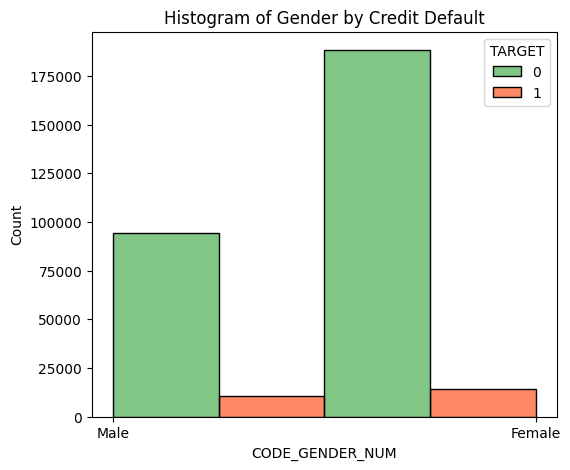

In [5]:
# 4: Does gender affect credit default risk?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("application_train.csv")

df['CODE_GENDER_NUM'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})

# Pie chart
gender_counts = df.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()
gender_counts.plot(kind='pie', y=1, autopct='%1.1f%%', figsize=(6,6), colors=['#4CAF50','#FF5722'], startangle=90)
plt.title("Default Rate by Gender")
plt.ylabel('')
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr_cols = list(numeric_cols) + ['CODE_GENDER_NUM']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Gender vs Credit Default")
plt.show()

target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
print("Top correlations with TARGET:\n", target_corr.head(10))

# Histogram
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='CODE_GENDER_NUM', hue='TARGET', bins=2, multiple='dodge', palette={0:'#4CAF50', 1:'#FF5722'}, alpha=0.7)
plt.title("Histogram of Gender by Credit Default")
plt.xticks([0,1], ['Male','Female'])
plt.show()


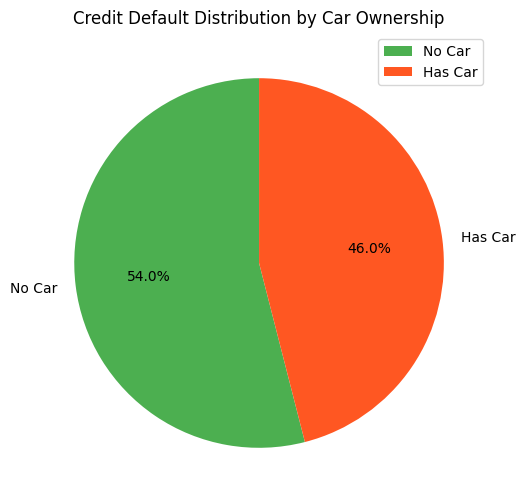

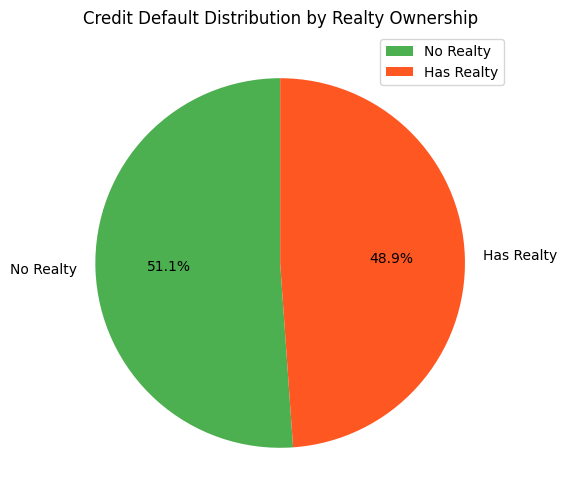

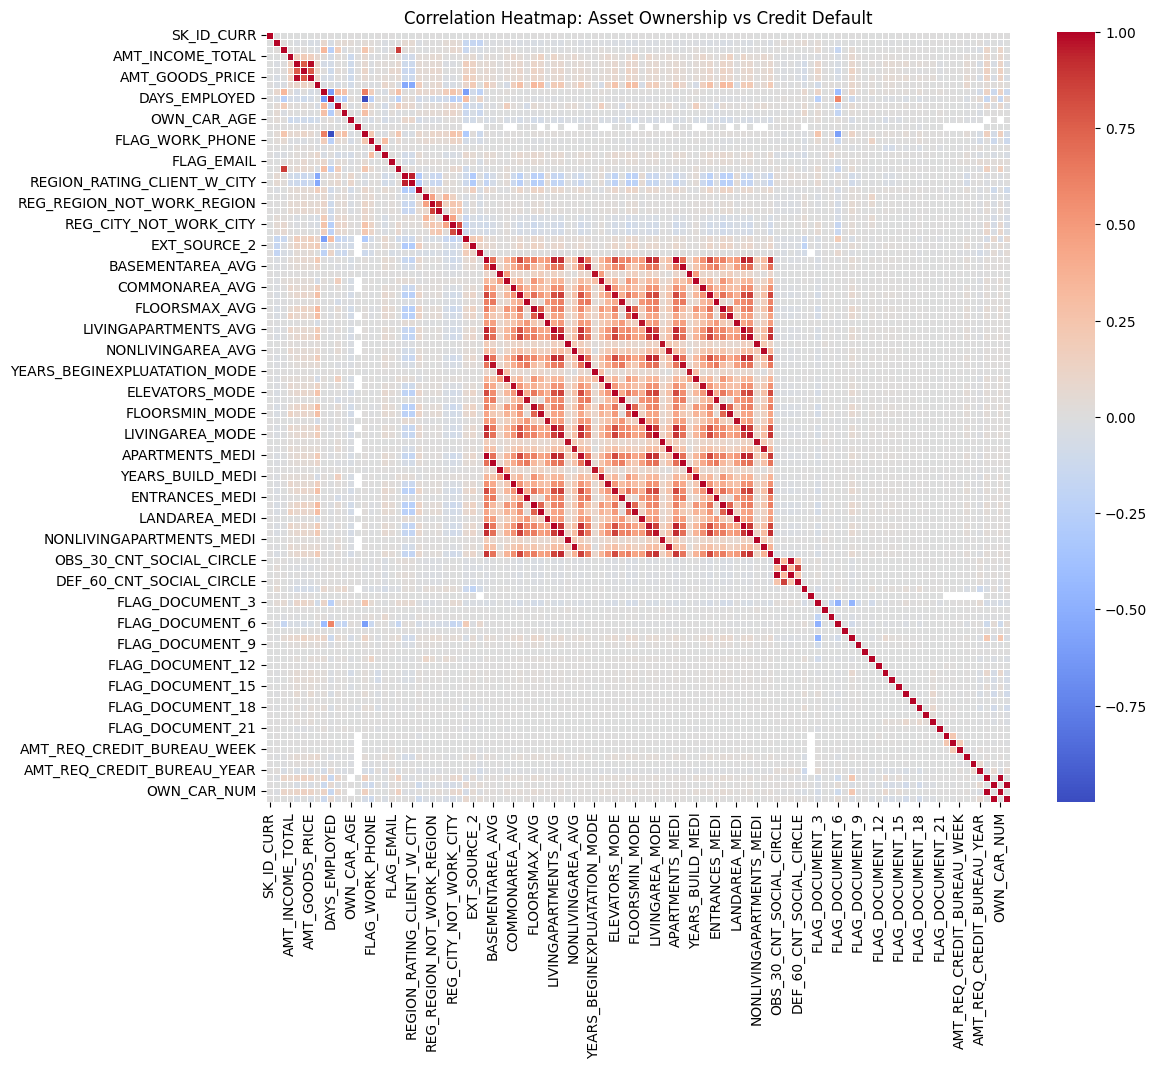

Top correlations with TARGET:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


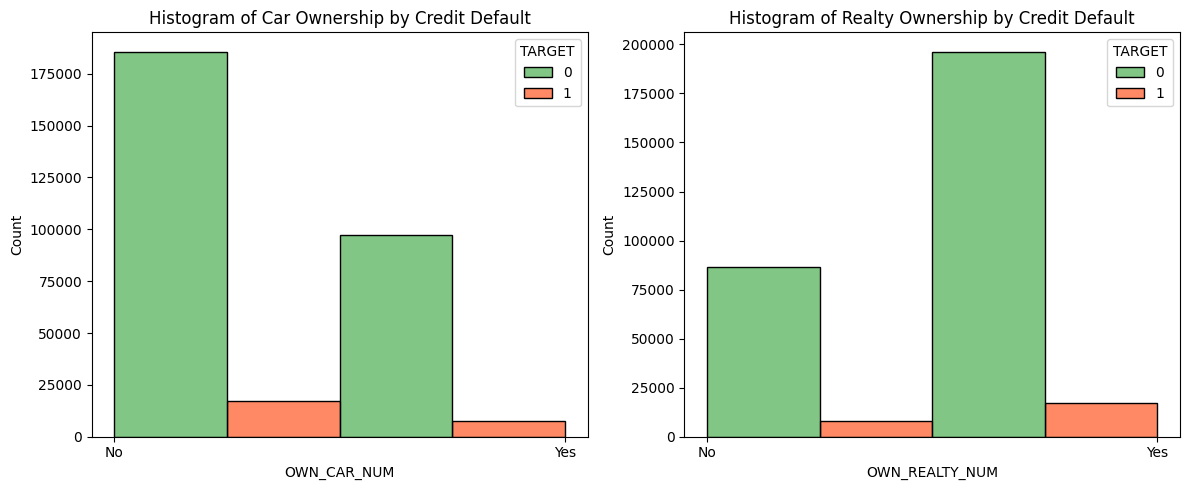

In [6]:
# 5: Does asset ownership affect credit default risk?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("application_train.csv")

df['OWN_CAR_NUM'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
df['OWN_REALTY_NUM'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

# Pie chart: Car Ownership
car_default_counts = df.groupby('OWN_CAR_NUM')['TARGET'].value_counts(normalize=True).unstack()
car_default_counts.plot(kind='pie', y=1, autopct='%1.1f%%', figsize=(6,6), startangle=90,
                        labels=['No Car','Has Car'], colors=['#4CAF50','#FF5722'])
plt.title("Credit Default Distribution by Car Ownership")
plt.ylabel('')
plt.show()

# Pie chart: Realty Ownership
realty_default_counts = df.groupby('OWN_REALTY_NUM')['TARGET'].value_counts(normalize=True).unstack()
realty_default_counts.plot(kind='pie', y=1, autopct='%1.1f%%', figsize=(6,6), startangle=90,
                           labels=['No Realty','Has Realty'], colors=['#4CAF50','#FF5722'])
plt.title("Credit Default Distribution by Realty Ownership")
plt.ylabel('')
plt.show()

# Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr_cols = list(numeric_cols) + ['OWN_CAR_NUM','OWN_REALTY_NUM']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Asset Ownership vs Credit Default")
plt.show()

target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
print("Top correlations with TARGET:\n", target_corr.head(10))

# Histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='OWN_CAR_NUM', hue='TARGET', bins=2, multiple='dodge',
             palette={0:'#4CAF50', 1:'#FF5722'}, alpha=0.7)
plt.title("Histogram of Car Ownership by Credit Default")
plt.xticks([0,1], ['No','Yes'])

plt.subplot(1,2,2)
sns.histplot(data=df, x='OWN_REALTY_NUM', hue='TARGET', bins=2, multiple='dodge',
             palette={0:'#4CAF50', 1:'#FF5722'}, alpha=0.7)
plt.title("Histogram of Realty Ownership by Credit Default")
plt.xticks([0,1], ['No','Yes'])

plt.tight_layout()
plt.show()
